In [21]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate

import pandas as pd
font_size=25
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"
myblack="#48494B"


import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

from settings_and_potential import *

In [63]:
## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################


range_int=[-50,50]
a=range_int[0]
b=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), a,b)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), a,b)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, a,b)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, a,b)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, a,b)[0],16)/norm

In [64]:
print(true_mom_1)
print(true_mom_2)
print(true_mom_3)
print(true_mom_4)

0.0
0.04999999999999991
0.0
0.007499999999999915


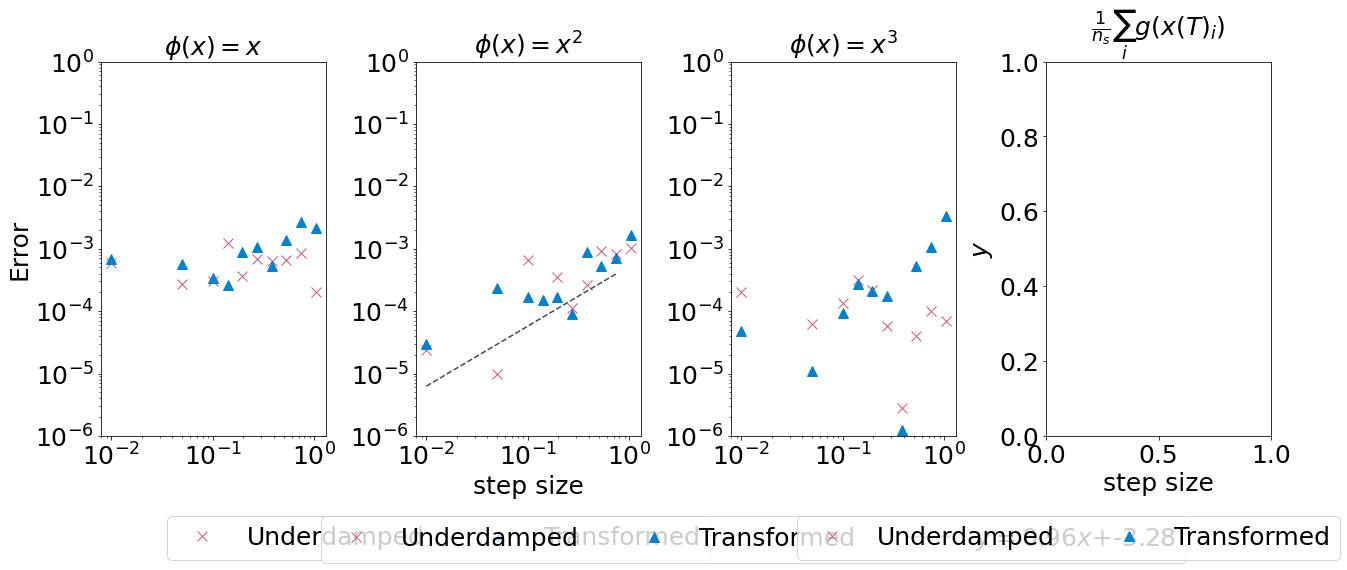

In [72]:
from settings_and_potential import *

# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/comp_int_methods")
mksize=10
# ###########################################
# ## Interpolate the slope
# ###########################################
dtlist =np.array([0.01,0.05,0.1,0.14,0.195,0.273,0.38,0.531,0.741,1.034])

xm= (dtlist)

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,8))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.25,bottom=0.25, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

## no adaptive 
###############
lab="Underdamped"

# Upload moments
mom1=np.hstack(openCfile("v1/noada_moment1.txt"))
mom2=np.hstack(openCfile("v1/noada_moment2.txt"))
mom3=np.hstack(openCfile("v1/noada_moment3.txt"))
# mom4_list=np.hstack(openCfile("noada_moment4.txt"))

mom1_list=np.abs(mom1-true_mom_1)
mom2_list=np.abs(mom2-true_mom_2)
mom3_list=np.abs(mom3-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax3.loglog(xm,(mom3_list),"x",markersize=mksize,color=myred,label=lab)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_tr=np.hstack(openCfile("v1/tr_moment1.txt"))
mom2_tr=np.hstack(openCfile("v1/tr_moment2.txt"))
mom3_tr=np.hstack(openCfile("v1/tr_moment3.txt"))
# mom4_list=np.hstack(openCfile("tr_moment4.txt"))

mom1_tr=np.abs(mom1_tr-true_mom_1)
mom2_tr=np.abs(mom2_tr-true_mom_2)
mom3_tr=np.abs(mom3_tr-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.loglog(xm,(mom1_tr),"^",markersize=mksize,color=myblue,label=lab)
ax2.loglog(xm,(mom2_tr),"^",markersize=mksize,color=myblue,label=lab)
ax3.loglog(xm,(mom3_tr),"^",markersize=mksize,color=myblue,label=lab)



# ## Add the first order line 
lb=0
ub=-1 #len(dtlist)+1
# x = np.log10(dtlist[lb:ub])
# A = np.vstack([x, np.ones(len(x))]).T
# m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
# ax1.loglog(dtlist[lb:ub], 10**(m*x + c),"--",color=myblack,label="1st order line")
# # ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.loglog(dtlist[lb:ub], 10**(m*x + c),"--",color=myblack,label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)))
# ax2.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

# x = np.log10(dtlist[lb:ub])
# A = np.vstack([x, np.ones(len(x))]).T
# m, c = np.linalg.lstsq(A, np.log10((mom3_list)[lb:ub]), rcond=None)[0]
# ax3.loglog(dtlist[lb:ub], 10**(m*x + c),"--",color=myblack) #,label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)))

ax1.set_ylim([10**(-6),10**0]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-6),10**0]) #change to -7.5 for a=2.5
ax3.set_ylim([10**(-6),10**0]) #change to -7.5 for a=2.5

#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\frac{1}{n_s}\\sum_{i} g(x(T)_i)$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
# ax2.set_ylabel("Error",fontsize=font_size)
# ax3.set_ylabel("Error",fontsize=font_size)
ax4.set_ylabel("$y$",fontsize=font_size)

# label of x axis
# ax1.set_xlabel("step size",fontsize=font_size)
ax2.set_xlabel("step size",fontsize=font_size)
# ax3.set_xlabel("step size",fontsize=font_size)
ax4.set_xlabel("step size",fontsize=font_size)

# ax4.semilogx(xm,g_mean,"o",markersize=mksize,color=myblack)
ax1.legend(fontsize=font_size,ncol=4,loc="upper center",bbox_to_anchor=(1.5, -0.18))
ax2.legend(fontsize=font_size,ncol=4,loc="upper center",bbox_to_anchor=(1.5, -0.18))
ax3.legend(fontsize=font_size,ncol=4,loc="upper center",bbox_to_anchor=(1.5, -0.18))

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/underdamped")

fig.savefig("figures/moments_logplot_spring_gamma="+str(gamma)+"untilT500.png")

In [81]:
dttry=10**np.linspace(-2,-0.,10)
dttry


array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ])

## Average values taken by g in v0, v1, v2



0.29399111441667
0.3300878619894058
0.3158788753856343
0.3181640670558283
0.3046351790433824
0.3047027806912976
0.3172490862336009
0.3862315293283177
0.3044460820125792


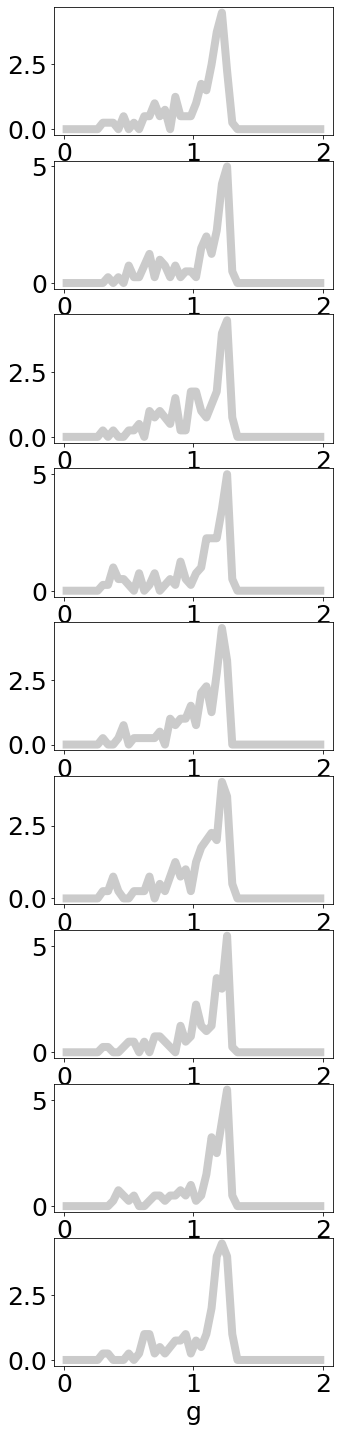

In [21]:
from settings_and_potential import *

# ###########################################
# ## Set up the path
# ###########################################

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/comp_int_methods")
ndt=9
nbins=50
i=0
fig, ((axs))= plt.subplots(ndt,1,figsize=(5,25))# plt.figure(figsize=(4,4))
for i in range(ndt):
    g1=np.hstack(openCfile("v1/vec_tr_gi="+str(i)+".txt"))
    ############
    ## Histograms g vals ## 
    ############
    range_bins_g=[0,2]
    histogram_g,bins = np.histogram(g1,bins=nbins,range=range_bins_g, density=True)
    midx_noada = (bins[0:-1]+bins[1:])/2
    mean_g=round(np.mean(g1),2)

    axs[i].plot(midx_noada,histogram_g,linewidth=lw*2,label='Average step='+str(mean_g),color=mygrey)
    axs[i].set_xlabel("g", fontsize=font_size)
    print(np.min(g1))





0.7509785966371871
0.7667421820623025
0.7861392075899056
0.7670993461420695
0.7852136104191467
0.7611403096012761


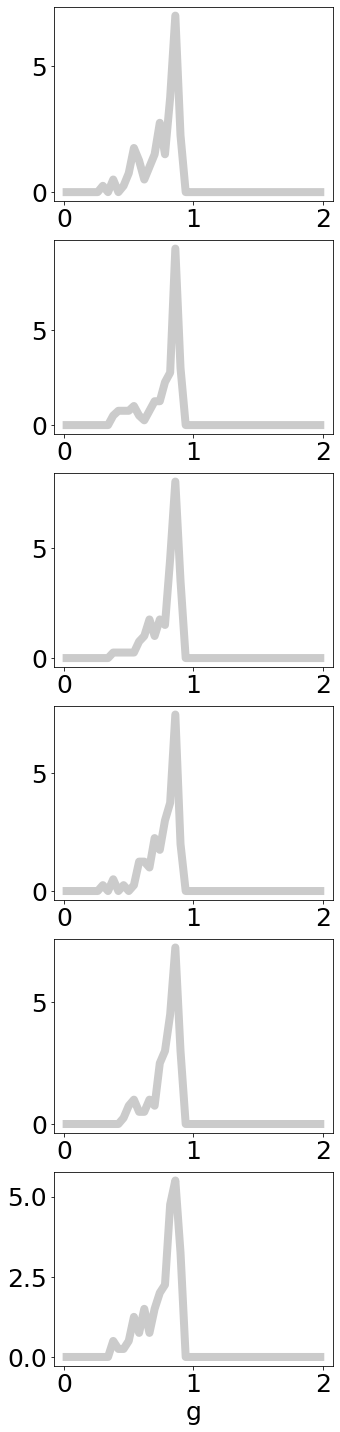

In [38]:
from settings_and_potential import *

# ###########################################
# ## Set up the path
# ###########################################

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/comp_int_methods")

nbins=50
i=0
fig, ((axs))= plt.subplots(6,1,figsize=(5,25))# plt.figure(figsize=(4,4))
for i in range(6):
    g1=np.hstack(openCfile("v1/vec_tr_springv1_gi="+str(i)+".txt"))
    ############
    ## Histograms g vals ## 
    ############
    range_bins_g=[0,2]
    histogram_g,bins = np.histogram(g1,bins=nbins,range=range_bins_g, density=True)
    midx_noada = (bins[0:-1]+bins[1:])/2
    mean_g=round(np.mean(g1),2)

    axs[i].plot(midx_noada,histogram_g,linewidth=lw*2,label='Average step='+str(mean_g),color=mygrey)
    axs[i].set_xlabel("g", fontsize=font_size)
    print(np.mean(g1))



In [ ]:
vector<double> dtlist ={0.1  , 0.14 , 0.195, 0.273, 0.38 , 0.531, 0.741, 1.034, 1.443, 2.014};


In [22]:
i=1

0.42761009259068444
0.4407152615747189


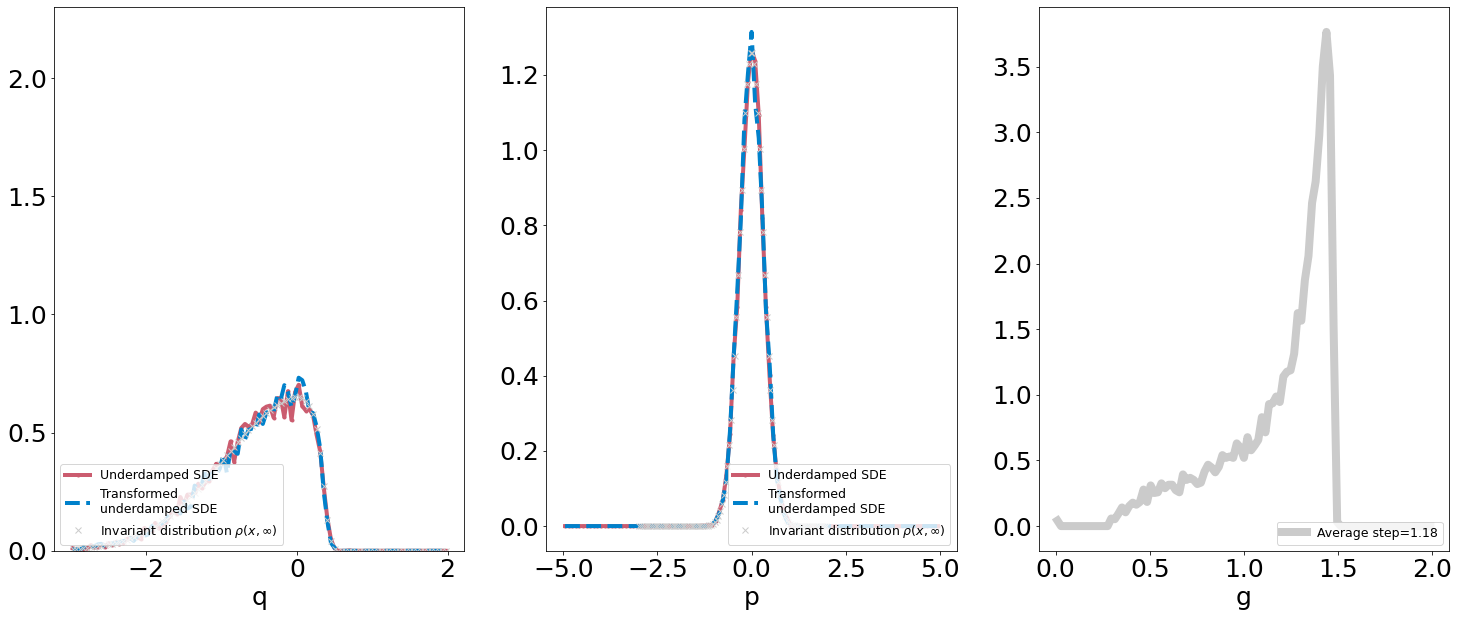

In [23]:
from settings_and_potential import *

# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/comp_int_methods/v2")


# ###########################################
# ## Import results
# ###########################################
fig, ((axs))= plt.subplots(1,3,figsize=(25,10))# plt.figure(figsize=(4,4))
# fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=105

n=4
range_bins=[-3,2]
# Upload moments

p_noada=np.hstack(openCfile("vec_noada_pi="+str(i)+".txt"))
q_noada=np.hstack(openCfile("vec_noada_qi="+str(i)+".txt"))
p_tr=np.hstack(openCfile("vec_tr_pi="+str(i)+".txt"))
q_tr=np.hstack(openCfile("vec_tr_qi="+str(i)+".txt"))
g1=np.hstack(openCfile("vec_tr_gi="+str(i)+".txt"))


############
## Q vals ##
############
# SDE
histogram_noada,bins = np.histogram(q_noada,bins=nbins,range=range_bins, density=True)
midx_sde = (bins[0:-1]+bins[1:])/2

#transformed
histogram_tr,bins = np.histogram(q_tr,bins=nbins,range=range_bins, density=True)
midx_tr = (bins[0:-1]+bins[1:])/2

# Q
###
axs[0].plot(midx_sde,histogram_noada,".-",linewidth=lw,label='Underdamped SDE',color=myred)
axs[0].plot(midx_tr,histogram_tr,"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
axs[0].set_ylim(0,2.3)
axs[0].set_xlabel("q", fontsize=font_size)


############
## P vals ## 
############
range_bins=[-5.,5.]

# no ada
histogram_noada,bins = np.histogram(p_noada,bins=nbins,range=range_bins, density=True)
midx_noada = (bins[0:-1]+bins[1:])/2

# transformed
histogram_tr,bins = np.histogram(p_tr,bins=nbins,range=range_bins, density=True)
midx_tr = (bins[0:-1]+bins[1:])/2

axs[1].plot(midx_noada,histogram_noada,".-",linewidth=lw,label='Underdamped SDE',color=myred)
axs[1].plot(midx_tr,histogram_tr,"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
axs[1].set_xlabel("p", fontsize=font_size)

############
## Histograms g vals ## 
############
range_bins_g=[0,2]
histogram_g,bins = np.histogram(g1,bins=nbins,range=range_bins_g, density=True)
midx_noada = (bins[0:-1]+bins[1:])/2
mean_g=round(np.mean(g1),2)

axs[2].plot(midx_noada,histogram_g,linewidth=lw*2,label='Average step='+str(mean_g),color=mygrey)
axs[2].set_xlabel("g", fontsize=font_size)


axs[0].set_xlabel("q", fontsize=font_size)


# Invariant distribution for q
rho = np.exp(- U(midx_sde)/tau)
rho = rho / (np.sum(rho)* (midx_sde[1]-midx_sde[0]) ) # Normalize rho by dividing by its approx. integral
axs[0].plot(midx_sde,rho,"x",linewidth=lw*2,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)

# Invariant distribution for p
### momentum p invariant
rho = np.exp(-(midx_sde**2)/(2*tau))
rho = rho / (np.sum(rho)* (midx_sde[1]-midx_sde[0]) ) # Normalize rho by dividing by its approx. integral
axs[1].plot(midx_sde,rho,"x",linewidth=lw,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)

axs[0].legend(fontsize=font_size/2, loc="lower left")
axs[1].legend(fontsize=font_size/2, loc="lower right")
axs[2].legend(fontsize=font_size/2, loc="lower right")


print(np.var(q_noada))

print(np.var(q_tr))

In [7]:
16/8


2.0